# CME 211: Lecture 11

## SciPy

See: <http://scipy.org/>

SciPy (pronounced "Sigh Pie") is a Python-based ecosystem of open-source
software for mathematics, science, and engineering. In particular, these are
some of the core packages:

![fig](fig/scipy-packages.png)

Actively developed:

![fig](fig/actively-developed.png)

### SciPy Subpackages

See: <http://docs.scipy.org/doc/scipy/reference/>

* Clustering package (`scipy.cluster`)
* Constants (`scipy.constants`)
* Discrete Fourier transforms (`scipy.fftpack`)
* Integration and ODEs (`scipy.integrate`)
* Interpolation (`scipy.interpolate`)
* Input and output (`scipy.io`)
* Linear algebra (`scipy.linalg`)
* Miscellaneous routines (`scipy.misc`)
* Multi-dimensional image processing (`scipy.ndimage`)
* Orthogonal distance regression (`scipy.odr`)
* Optimization and root finding (`scipy.optimize`)
* Signal processing (`scipy.signal`)
* Sparse matrices (`scipy.sparse`)
* Sparse linear algebra (`scipy.sparse.linalg`)
* Compressed Sparse Graph Routines (`scipy.sparse.csgraph`)
* Spatial algorithms and data structures (`scipy.spatial`)
* Special functions (`scipy.special`)
* Statistical functions (`scipy.stats`)
* Statistical functions for masked arrays (`scipy.stats.mstats`)
* C/C++ integration (`scipy.weave`)

### Loading and saving MATLAB files

Let's create a MATLAB data file in Octave.  Octave is an open source MATLAB clone:

```
octave:1> a = [42, 17, -19; 9, 3, 0];
octave:2> a
a =

   42   17  -19
    9    3    0

octave:3> save -6 matlabfile.mat a
octave:4>
```


Let's use SciPy to open the matlab data file:

In [1]:
import scipy.io
data = scipy.io.loadmat('matlabfile.mat')
print(data)
print(data['a'])

{'__header__': b'MATLAB 5.0 MAT-file, written by Octave 4.2.0-rc2, 2016-10-19 17:23:45 UTC', '__version__': '1.0', '__globals__': [], 'a': array([[ 42.,  17., -19.],
       [  9.,   3.,   0.]])}
[[ 42.  17. -19.]
 [  9.   3.   0.]]


Note: SciPy submodules must be specifically imported.  For example the `io`
module is not imported with `import scipy`.  Need to `import scipy.io`.

```
>>> import scipy
>>> data = scipy.io.loadmat('matlabfile.mat')
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
AttributeError: 'module' object has no attribute 'io'
```


### More I/O

* Image support

* Little bit of audio support

* Support for [NetCDF][https://en.wikipedia.org/wiki/NetCDF] (Network Common
Data Form), a file format used in scientific computing for handling large arrays
of data

* Support for [HDF][https://en.wikipedia.org/wiki/Hierarchical_Data_Format].
  (NetCDF 4 is based on HDF5)

### Image Processing

In [2]:
import numpy
import scipy.misc, scipy.signal
im = scipy.misc.imread('fig/memchu.jpg',flatten=True).astype(numpy.float32)
laplacian = numpy.array([[0,1,0],[1,-4,1],[0,1,0]], dtype=numpy.float32)
ck = scipy.signal.cspline2d(im, 8.0)
edge = scipy.signal.convolve2d(ck, laplacian,mode='same',boundary='symm')
scipy.misc.imsave('fig/edge.jpg', edge)

Note: `scipy.misc.imread()` requires the Python Imaging Library (PIL). This will
be installed with Anaconda Python. It is also possible to install via `$ pip3
isntall pillow`.

Input image:

![fig](fig/memchu.jpg)

Output image:

![fig](fig/edge.jpg)

### Quadrature

Quadrature = numerical integration.  We want an approximation to:

$$
\int_a^b f(x) dx
$$

In [3]:
import scipy.integrate

# define function to integrate
def line(x):
    return x

print(scipy.integrate.quad(line, 0., 1.))
print(scipy.integrate.quad(line, -1., 1.))

(0.5, 5.551115123125783e-15)
(0.0, 1.106084004151732e-14)


### Optimization

Numerical optimization methods attempt to solve the problem:

$$
\begin{array}{ll} \mbox{minimize} & f_0(x)\\
\mbox{subject to} & f_i(x) \leq 0, \quad i=1,\ldots,m
\end{array}
$$

Let's use `scipy.optimize` to solve an unconstrained optimization problem:

In [4]:
import numpy
import scipy.optimize
import math
def rosenbrock(xy):
    x = xy[0]
    y = xy[1]
    f = math.pow(1.-x,2.) + 100*math.pow(y-x*x,2.)
    return f

xy0 = numpy.array([0., 0.])
min = scipy.optimize.fmin(rosenbrock, xy0)
print(min)
print(rosenbrock(min))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 146
[ 1.00000439  1.00001064]
3.6861769151759075e-10


### Linear algebra

* Matrix inversion
* Linear solver (direct)
* Least squares
* Eigenvalues / eigenvectors
* Singular Value Decomposition (SVD)
* LU, QR, Cholesky, Schur matrix factorizations

### Solver example

Here is a $3 \times 3$ system of linear equations:

\begin{align}
y + 2x - z &= 8 \\
2z - y - 3x &= -11 \\
-2x + 2z + y &= -3 \\
\end{align}

Convert to matrix-vector form:

$$
\begin{pmatrix}
1 & 2 & -1 \\
2 & -1 & -3 \\
-2 & 2 & 1 
\end{pmatrix}
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
=
\begin{pmatrix}
8 \\ -11 \\ -3
\end{pmatrix}
$$

Solve with Python:

In [5]:
import numpy
import scipy.linalg
A = numpy.array(([2., 1., -1.],[-3., -1., 2.],[-2., 1., 2.]))
b = numpy.array([8., -11., -3.])
x = scipy.linalg.solve(A, b)
# print the solution
print(x)
# check the solution
print(scipy.linalg.norm(numpy.dot(A,x)-b))

[ 2.  3. -1.]
9.930136612989092e-16


### Sparse matrices

* Many problems lead to matrices with large numbers of zeros (like > 99% zeros)

* Discretization of Partial Differential Equations (PDEs), social graphs, etc.

* Can store these efficiently using a sparse matrix storage format such as
Compressed Row Storage (CRS), sometimes also called Compressed Sparse Row (CSR)

* One typical format for file exchange is Matrix Market (`.mtx`)

* See: <http://math.nist.gov/MatrixMarket/>

* Another source for sparse matrices: <https://www.cise.ufl.edu/research/sparse/matrices/>

### Compressed Row Storage

Dense matrix :

$$
\begin{bmatrix}
10 & 0 & 0 & 0 \\
 3 & 9 & 0 & 0 \\
 0 & 7 & 8 & 7 \\
 0 & 0 & 3 & 7 
\end{bmatrix}
$$

Sparse matrix storage with 0-based indexing:

```
val: 10 3 9 7 8 7 3 7
col_ind: 0 0 1 1 2 3 2 3
row_ptr: 0 1 3 6 8
```


Question: what is the storage complexity for these different storage methods?

### Matrix Market files

```
!head -n 20 data/LFAT5.mtx
```


### Reading / writing sparse matrices

In [6]:
import scipy.io
A = scipy.io.mmio.mmread('data/LFAT5.mtx')
print(A)

  (0, 0)	1.57088
  (3, 0)	-94.2528
  (4, 0)	0.78544
  (1, 1)	12566400.0
  (5, 1)	-6283200.0
  (2, 2)	0.60880620155
  (6, 2)	-0.304403100775
  (3, 3)	15080.448
  (7, 3)	-7540.224
  (8, 3)	94.2528
  (4, 4)	3.14176
  (7, 4)	-94.2528
  (8, 4)	0.78544
  (5, 5)	12566400.0
  (9, 5)	-6283200.0
  (6, 6)	0.60880620155
  (10, 6)	-0.304403100775
  (7, 7)	15080.448
  (11, 7)	-7540.224
  (12, 7)	94.2528
  (8, 8)	3.14176
  (11, 8)	-94.2528
  (12, 8)	0.78544
  (9, 9)	12566400.0
  (10, 10)	0.60880620155
  (11, 11)	15080.448
  (13, 11)	94.2528
  (12, 12)	3.14176
  (13, 12)	0.78544
  (13, 13)	1.57088
  (0, 3)	-94.2528
  (0, 4)	0.78544
  (1, 5)	-6283200.0
  (2, 6)	-0.304403100775
  (3, 7)	-7540.224
  (3, 8)	94.2528
  (4, 7)	-94.2528
  (4, 8)	0.78544
  (5, 9)	-6283200.0
  (6, 10)	-0.304403100775
  (7, 11)	-7540.224
  (7, 12)	94.2528
  (8, 11)	-94.2528
  (8, 12)	0.78544
  (11, 13)	94.2528
  (12, 13)	0.78544


### Sparse matrix applications

See <https://www.cise.ufl.edu/research/sparse/matrices/>.

### Sparse linear solvers

* In the `scipy.sparse.linalg` subpackage
* Direct solver
* Iterative solvers
    * Conjugate Gradient (CG)
    * BiConjugate Gradient (BiCG)
    * BiConjugate Gradient STABilized (BiCGSTAB)
    * MINimum RESidual (MINRES)
    * Generalized Minimum RESidual (GMRES)
* Factorizations

### Sparse solver examples

In [7]:
import numpy
import scipy.io
import scipy.linalg
import scipy.sparse.linalg
import time

K = scipy.io.mmio.mmread('data/nasa1824.mtx').tocsr()
f = numpy.squeeze(scipy.io.mmio.mmread('data/nasa1824_b.mtx'))

# Direct solve
t0 = time.time()
u = scipy.sparse.linalg.spsolve(K, f)
t1 = time.time()
err = scipy.linalg.norm(K*u - f)
print("spsolve() time = %f seconds" % (t1-t0))
print("err = %e" % err)

# Iterative solve (Conjugate Gradient)
t0 = time.time()
u, info = scipy.sparse.linalg.cg(K, f, tol=1.e-7)
t1 = time.time()
err = scipy.linalg.norm(K*u - f)
print("cg() time = %f seconds" % (t1-t0))
print("err = %e" % err)
print("info = %d" % info)

spsolve() time = 0.077657 seconds
err = 2.174875e-09
cg() time = 0.307647 seconds
err = 3.054142e-02
info = 0


### Sparse matrix eigenvalues

In [8]:
import scipy.io
import scipy.sparse.linalg
A = scipy.io.mmio.mmread('data/LFAT5.mtx')
scipy.sparse.linalg.eigsh(A,return_eigenvectors=False)

array([  4.41997801e+03,   1.50822153e+04,   2.57444527e+04,
         3.68061334e+06,   1.25664000e+07,   2.14521867e+07])

### SciPy summary

* Take a look at what is available so when the time comes you will know not to
write those things from scratch

* Some of these even allow you to utilize parallel computing because the
implementations are multithreaded and will use multiple CPU cores

## matplotlib

Examples from: <http://matplotlib.org/gallery.html>

### Getting started

* Plotting functionality can be access through either of
these two module names:

  * `matplotlib.pyplot`

  * `pylab`

* `pylab` module combines the namespaces of the `matplotlib.pyplot` module plus
`numpy` and is intended for quick, interactive use

* `matplotlib.pyplot` is intended for use when writing code to be executed out
of a `.py` file

* Conventions:

  * `import matplotlib.pyplot as plt`

  * `import numpy as np`

### `pylab` includes `numpy`

In [9]:
import pylab
a = pylab.arange(9, dtype=pylab.float64)
print(a)
a = pylab.arange(9, dtype=pylab.float64).reshape(3,3)
print(a)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]


### `matplotlib.pyplot`

Doesn't include numpy functionality:

In [10]:
import matplotlib.pyplot
a = matplotlib.pyplot.arange(9)

AttributeError: module 'matplotlib.pyplot' has no attribute 'arange'

### Your first plot

Some good Jupyter Settings:

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

A simple plot:

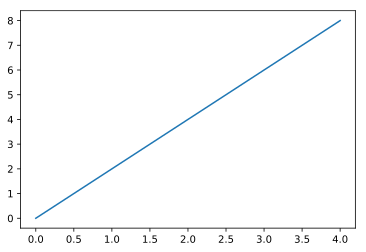

In [12]:
plt.plot(2*np.arange(5))

### Saving to a file

The `savefig` function saves the most recent plot to disk.  The file type is
determined by the extension:

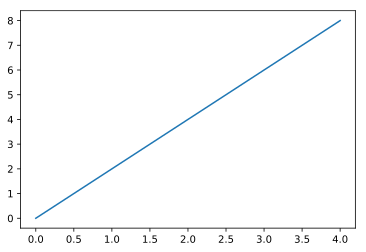

In [13]:
plt.plot(2*np.arange(5))
plt.savefig('figure1.jpg')
plt.savefig('figure1.png')
plt.savefig('figure1.pdf')

Let's look at the files!

In [14]:
%ls

0-data-representation.ipynb  data/
0-data-representation.md     fig/
0-data-representation.pdf    figure1.jpg
1-numpy.ipynb                figure1.pdf
1-numpy.md                   figure1.png
1-numpy.pdf                  makefile
2-scipy.ipynb                matlabfile.mat
2-scipy.md                   numbers.txt
code/


### Start a new figure

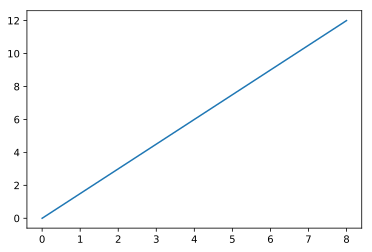

In [15]:
plt.figure(2)
plt.plot(2*np.arange(5), 3*np.arange(5))
plt.show(block=False)

### Controlling the line type

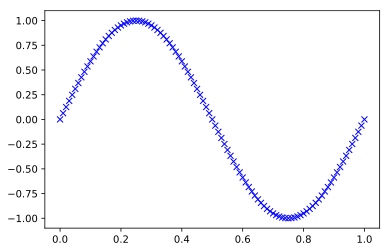

In [16]:
plt.figure(3)
time = np.arange(0,1.01,0.01)
signal = np.sin(2*np.pi*time)
plt.plot(time, signal, 'bx')
plt.show(block=False)

### Text

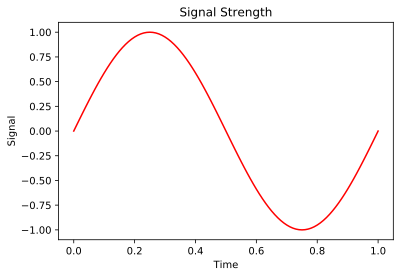

In [17]:
plt.figure(4)
plt.plot(time, signal, 'r-')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal Strength')
plt.show(block=False)

### Axis

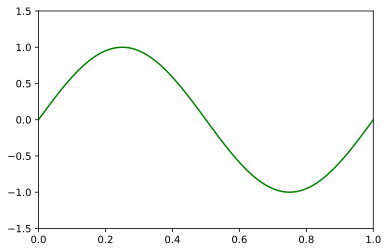

In [18]:
plt.figure(5)
plt.plot(time,signal,'g-')
plt.axis([0, 1, -1.5, 1.5])
plt.show(block=False)

### Plotting multiple data

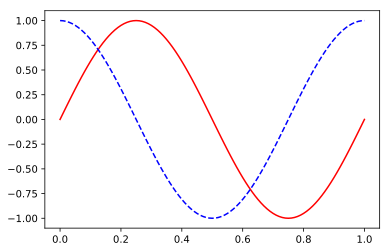

In [19]:
plt.figure(6)
signal2 = np.cos(2*np.pi*time)
plt.plot(time,signal,'r-',time,signal2,'b--')
plt.show(block=False)

### Legend

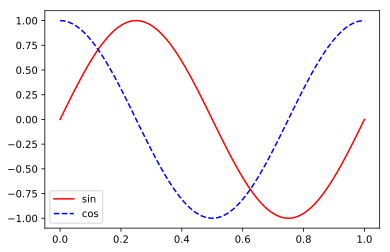

In [20]:
plt.figure(7)
p1, = plt.plot(time,signal,'r-')
p2, = plt.plot(time,signal2,'b--')
plt.legend([p1, p2], ["sin", "cos"])
plt.show(block=False)

### Subplots

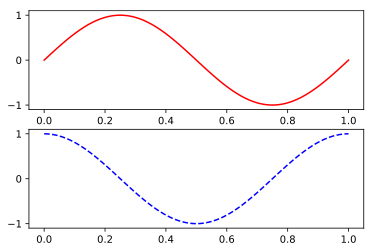

In [21]:
plt.figure(8)
plt.subplot(211)
plt.plot(time,signal,'r-')
plt.subplot(212)
plt.plot(time,signal2,'b--')
plt.show(block=False)

### Pseudocolor plot

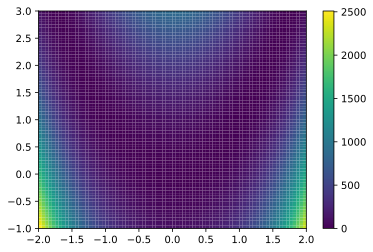

In [22]:
delta = 0.05
X = np.arange(-2., 2.+delta, delta)
Y = np.arange(-1., 3.+delta, delta)
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2
plt.figure(9)
plt.pcolor(X, Y, Z)
plt.colorbar()
plt.axis([-2, 2, -1, 3])
plt.show(block=False)